# 📊 Análise Exploratória de Dados - ENEM Pernambuco (2020-2023)

Esta análise investiga o desempenho de estudantes no ENEM em Pernambuco, com foco especial na comparação entre escolas públicas e privadas e na correlação com fatores socioeconômicos.

**Objetivo Principal:** Comparar o desempenho entre escolas públicas e privadas em Pernambuco e investigar correlações socioeconômicas.

**Período Analisado:** 2020-2023

**Fonte dos Dados:** Microdados do ENEM (INEP)

### 📚 Bloco 1 - Importação de Bibliotecas

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# ============== CONFIGURAÇÃO DE IDENTIDADE VISUAL ==============
# Paleta de cores principal (tons de azul)
CORES_PRINCIPAIS = {
    'azul_principal': '#1E3A8A',      # Azul escuro principal
    'azul_medio': '#3B82F6',          # Azul médio
    'azul_claro': '#60A5FA',          # Azul claro
    'azul_muito_claro': '#DBEAFE',    # Azul muito claro para fundos
    'cinza_escuro': '#374151',        # Cinza escuro para textos
    'cinza_medio': '#6B7280',         # Cinza médio
    'branco': '#FFFFFF',              # Branco
    'verde_sucesso': '#10B981',       # Verde para destaque positivo
    'laranja_alerta': '#F59E0B',      # Laranja para alertas
    'vermelho_erro': '#EF4444'        # Vermelho para valores negativos
}

# Paleta gradiente azul (5 tons)
PALETA_AZUL = ['#1E3A8A', '#3B82F6', '#60A5FA', '#93C5FD', '#DBEAFE']

# Paleta para múltiplas categorias (baseada em azul com complementares)
PALETA_CATEGORIAS = ['#1E3A8A', '#3B82F6', '#10B981', '#F59E0B', '#8B5CF6', '#EF4444']

# Configurações de estilo matplotlib
plt.style.use('default')
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'font.size': 11,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans'],
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelsize': 12,
    'axes.labelweight': 'normal',
    'axes.linewidth': 1.2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.linewidth': 0.8,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'legend.frameon': True,
    'legend.fancybox': True,
    'legend.shadow': True,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white'
})

# Configurações seaborn
sns.set_palette(PALETA_AZUL)
sns.set_style("whitegrid", {
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': True,
    'grid.color': CORES_PRINCIPAIS['cinza_medio'],
    'grid.alpha': 0.3
})

# Configurações pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

def aplicar_estilo_grafico(ax, titulo="", xlabel="", ylabel="", remover_spines=True):
    """Função para aplicar estilo consistente aos gráficos"""
    if titulo:
        ax.set_title(titulo, fontsize=14, fontweight='bold', 
                    color=CORES_PRINCIPAIS['cinza_escuro'], pad=20)
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=12, color=CORES_PRINCIPAIS['cinza_escuro'])
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=12, color=CORES_PRINCIPAIS['cinza_escuro'])
    
    if remover_spines:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    ax.spines['bottom'].set_color(CORES_PRINCIPAIS['cinza_medio'])
    ax.spines['left'].set_color(CORES_PRINCIPAIS['cinza_medio'])
    ax.tick_params(colors=CORES_PRINCIPAIS['cinza_escuro'])
    ax.grid(True, alpha=0.3, color=CORES_PRINCIPAIS['cinza_medio'])

def adicionar_valores_barras(ax, bars, formato='{:.1f}', offset=3, fontsize=10):
    """Função para adicionar valores no topo das barras"""
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + offset,
                formato.format(height).replace(',', '.'), ha='center', va='bottom', 
                fontweight='bold', fontsize=fontsize, 
                color=CORES_PRINCIPAIS['cinza_escuro'])

print("✅ Bibliotecas e configurações de identidade visual carregadas com sucesso!")
print("🎨 Paleta principal: Tons de azul com elementos complementares")
print("📊 Estilo padronizado aplicado para todos os gráficos")

✅ Bibliotecas e configurações de identidade visual carregadas com sucesso!
🎨 Paleta principal: Tons de azul com elementos complementares
📊 Estilo padronizado aplicado para todos os gráficos


### 🔧 Bloco 2 - Carregamento dos Dados

In [83]:
print("=" * 80)
print("CARREGAMENTO DOS DADOS")
print("=" * 80)

# Carregar dicionário de dados
print("\n📖 Carregando dicionário de dados...")
try:
    dicionario = pd.read_csv('../data/processed/microdados_enem_geral/Dicionário_Microdados_Enem_GERAL.csv', encoding='latin-1')
    print(f"✅ Dicionário carregado: {dicionario.shape[0]} entradas")
except Exception as e:
    print(f"❌ Erro ao carregar dicionário: {e}")

# Carregar dados do ENEM
print("\n📊 Carregando dados do ENEM...")
try:
    df = pd.read_csv('../data/processed/microdados_enem_geral/MICRODADOS_ENEM_GERAL.csv', sep=';', low_memory=False, encoding='latin-1')
    print(f"✅ Dataset carregado: {df.shape[0]:,} linhas e {df.shape[1]} colunas")
    print(f"📅 Período: {df['NU_ANO'].min()} - {df['NU_ANO'].max()}")
except Exception as e:
    print(f"❌ Erro ao carregar dados: {e}")

CARREGAMENTO DOS DADOS

📖 Carregando dicionário de dados...
✅ Dicionário carregado: 256 entradas

📊 Carregando dados do ENEM...
✅ Dataset carregado: 124,126 linhas e 71 colunas
📅 Período: 2020 - 2023


### 📊 Bloco 3 - Visualização Inicial dos Dados

In [84]:
print("\n📋 Primeiras linhas do dataset:")
print(df.head())

print("\n📊 Informações gerais do dataset:")
print(df.info())

print("\n📈 Estatísticas descritivas:")
print(df.describe())


📋 Primeiras linhas do dataset:
   NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
0  200006630957    2020                2       F                1   
1  200006589793    2020                3       F                1   
2  200005362501    2020                3       F                1   
3  200006431701    2020                2       F                1   
4  200005557710    2020                3       M                1   

   TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ESCOLA  TP_ENSINO  \
0            3                 1                2          2        1.0   
1            1                 1                2          2        1.0   
2            1                 1                2          2        1.0   
3            3                 1                2          2        1.0   
4            3                 1                2          2        1.0   

   IN_TREINEIRO  CO_MUNICIPIO_ESC        NO_MUNICIPIO_ESC  CO_UF_ESC  \
0             0         261070

### 📏 Bloco 4 - Distribuição por ano

In [85]:
# Verificar distribuição por ano
print("\n📊 Distribuição por ano:")
distribuicao_ano = df['NU_ANO'].value_counts().sort_index()
for ano, count in distribuicao_ano.items():
    print(f"  {ano}: {count:,} participantes")


📊 Distribuição por ano:
  2020: 27,451 participantes
  2021: 29,963 participantes
  2022: 32,060 participantes
  2023: 34,652 participantes


### 🔧 Bloco 5 - Tratamento dos Dados

In [86]:
print("\n🔧 TRATAMENTO DOS DADOS")
print("-" * 50)

# Criar mapeamentos baseados no dicionário
escola_map = {1: 'Não Respondeu', 2: 'Pública', 3: 'Privada', 4: 'Exterior'}
sexo_map = {'M': 'Masculino', 'F': 'Feminino'}
raca_map = {0: 'Não declarado', 1: 'Branca', 2: 'Preta', 3: 'Parda', 
            4: 'Amarela', 5: 'Indígena', 6: 'Não dispõe'}
dep_adm_map = {1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada'}

# Aplicar mapeamentos
df['TIPO_ESCOLA'] = df['TP_ESCOLA'].map(escola_map)
df['SEXO'] = df['TP_SEXO'].map(sexo_map)
df['COR_RACA'] = df['TP_COR_RACA'].map(raca_map)
df['DEP_ADMINISTRATIVA'] = df['TP_DEPENDENCIA_ADM_ESC'].map(dep_adm_map)

print("✅ Mapeamentos de variáveis categóricas criados")
notas_cols = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

# Criar nota média
df['NOTA_MEDIA'] = df[notas_cols].mean(axis=1)


🔧 TRATAMENTO DOS DADOS
--------------------------------------------------
✅ Mapeamentos de variáveis categóricas criados


### 📊 Bloco 6 - Análise Descritiva Geral

In [87]:
print("\n📈 ANÁLISE DESCRITIVA GERAL")
print("-" * 50)

# Distribuição por tipo de escola
print("\n🏫 Distribuição por tipo de escola:")
distribuicao_escola = df['TIPO_ESCOLA'].value_counts()
for escola, count in distribuicao_escola.items():
    pct = count / len(df) * 100
    print(f"  {escola}: {count:,} ({pct:.1f}%)")

# Estatísticas descritivas das notas
print("\n📊 Estatísticas descritivas das notas:")
stats_notas = df[notas_cols].describe()
print(stats_notas.round(2))


📈 ANÁLISE DESCRITIVA GERAL
--------------------------------------------------

🏫 Distribuição por tipo de escola:
  Pública: 94,319 (76.0%)
  Privada: 29,807 (24.0%)

📊 Estatísticas descritivas das notas:
       NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO
count   124126.00   124126.00   124126.00   124126.00        124126.00
mean       488.96      512.73      510.67      536.01           625.36
std         77.49       88.30       76.15      118.90           219.13
min          0.00        0.00        0.00        0.00             0.00
25%        431.60      450.20      460.70      440.30           520.00
50%        482.50      514.70      514.90      522.20           640.00
75%        542.50      574.70      564.80      621.00           800.00
max        844.30      839.50      801.00      985.70          1000.00


### 📊 Bloco 7 - Visualização: Distribuição por Ano

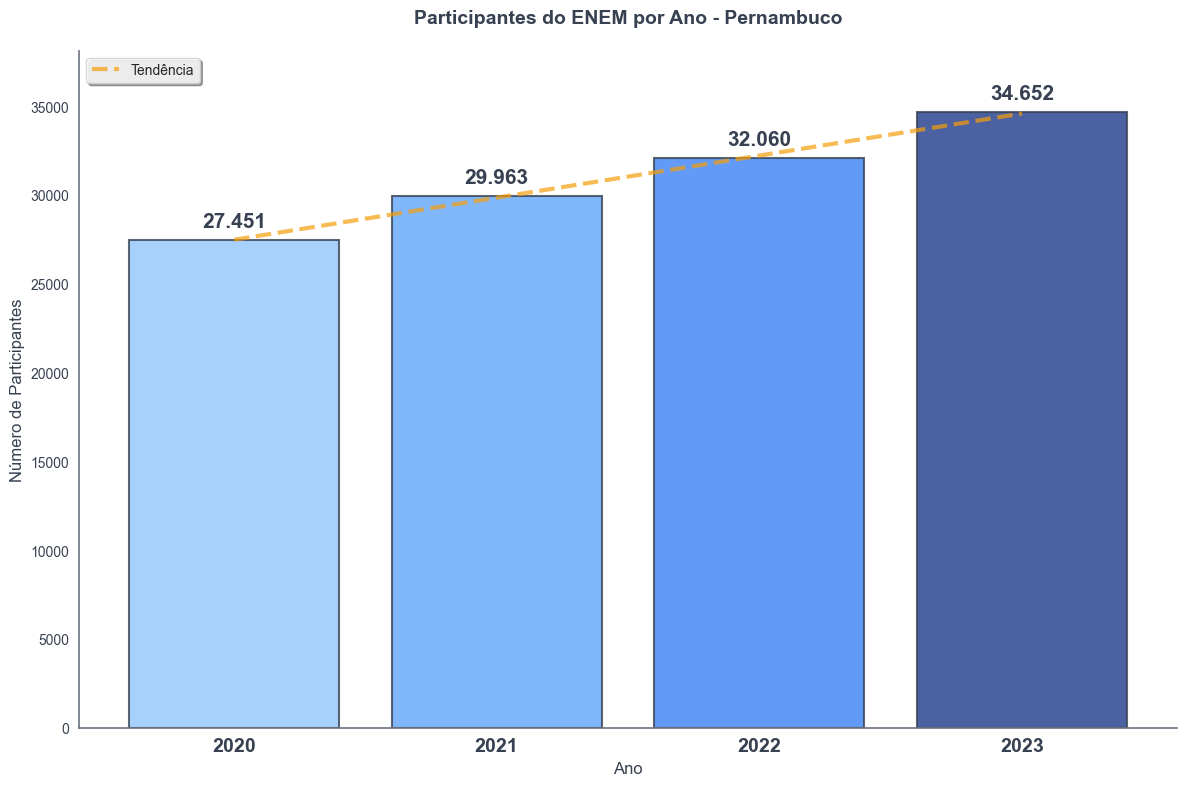

In [88]:
# Gráfico: Distribuição por ano
plt.figure(figsize=(12, 8))

distribuicao_ano = df['NU_ANO'].value_counts().sort_index()

# Criar gradiente de cores azuis
cores_anos = [ '#93C5FD', '#60A5FA', '#3B82F6','#1E3A8A']

bars = plt.bar(distribuicao_ano.index, distribuicao_ano.values, 
               color=cores_anos, alpha=0.8, edgecolor=CORES_PRINCIPAIS['cinza_escuro'], 
               linewidth=1.5)

# Aplicar estilo personalizado
ax = plt.gca()
aplicar_estilo_grafico(ax, 
                      titulo='Participantes do ENEM por Ano - Pernambuco',
                      xlabel='Ano', 
                      ylabel='Número de Participantes')

# Adicionar valores nas barras
adicionar_valores_barras(ax, bars, formato='{:,}', offset=500, fontsize=15)

# Melhorar aparência
plt.xticks(distribuicao_ano.index, fontweight='bold', fontsize=14)
plt.ylim(0, max(distribuicao_ano.values) * 1.1)
plt.grid(False)

# Adicionar linha de tendência sutil
if len(distribuicao_ano) > 2:
    z = np.polyfit(distribuicao_ano.index, distribuicao_ano.values, 1)
    p = np.poly1d(z)
    plt.plot(distribuicao_ano.index, p(distribuicao_ano.index), 
             color=CORES_PRINCIPAIS['laranja_alerta'], linewidth=3, alpha=0.7, 
             linestyle='--', label='Tendência')
    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### 📊 Bloco 8 - Visualização: Distribuição por Tipo de Escola

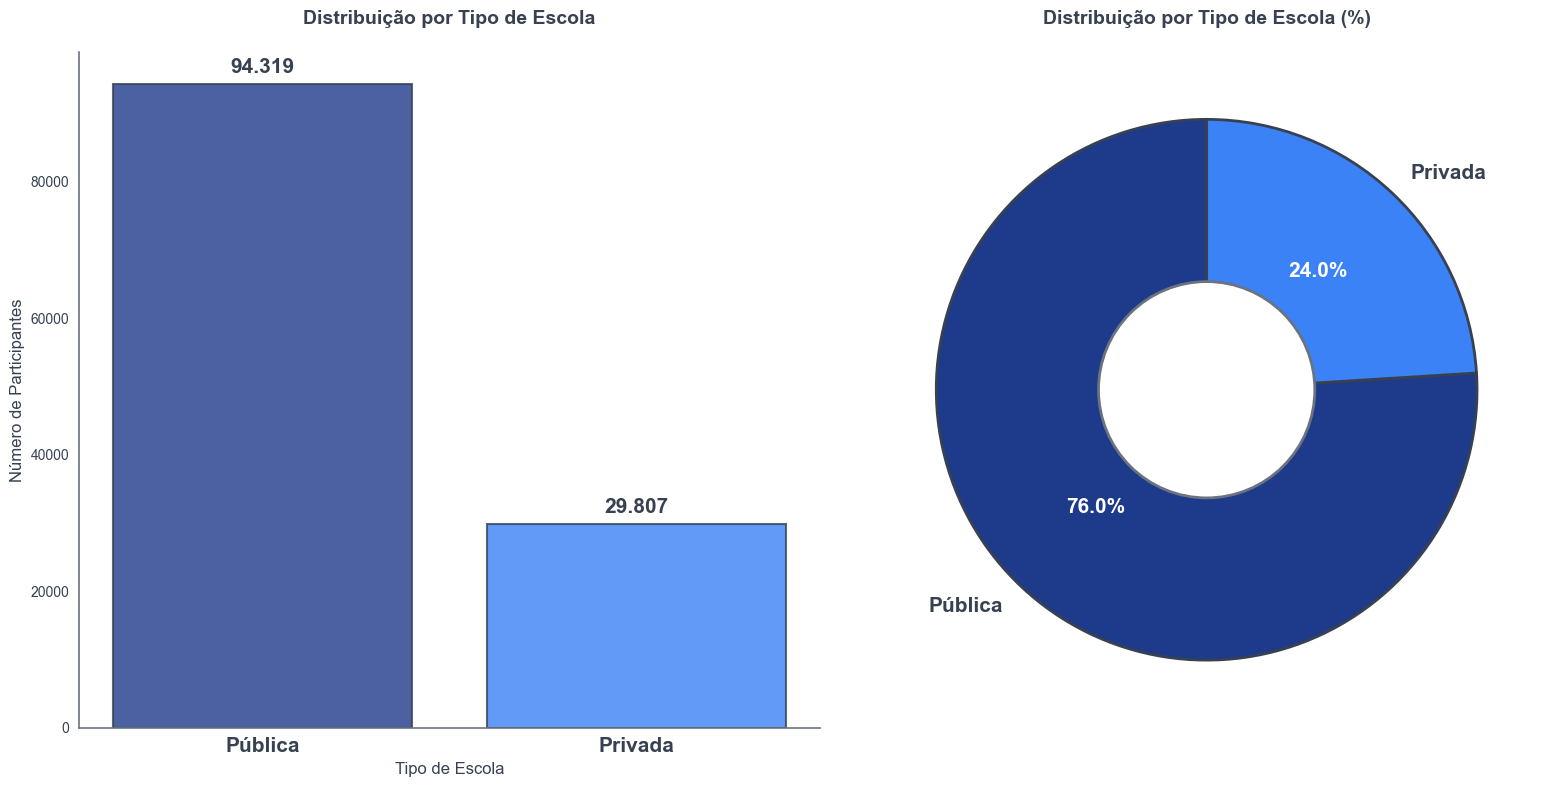

In [103]:
# Gráfico: Distribuição por tipo de escola
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico 1: Contagem absoluta
distribuicao_escola = df['TIPO_ESCOLA'].value_counts()
cores_escola = [CORES_PRINCIPAIS['azul_principal'], CORES_PRINCIPAIS['azul_medio'], 
                CORES_PRINCIPAIS['azul_claro'], CORES_PRINCIPAIS['cinza_medio']][:len(distribuicao_escola)]

bars = axes[0].bar(range(len(distribuicao_escola)), distribuicao_escola.values, 
                   color=cores_escola, alpha=0.8, 
                   edgecolor=CORES_PRINCIPAIS['cinza_escuro'], linewidth=1.5)

aplicar_estilo_grafico(axes[0], 
                      titulo='Distribuição por Tipo de Escola',
                      xlabel='Tipo de Escola', 
                      ylabel='Número de Participantes')

axes[0].set_xticks(range(len(distribuicao_escola)))
axes[0].set_xticklabels(distribuicao_escola.index, fontweight='bold', fontsize=15)
axes[0].grid(False)

# Adicionar valores nas barras
adicionar_valores_barras(axes[0], bars, formato='{:,}', offset=1000, fontsize=15)

# Gráfico 2: Pizza com estilo melhorado
wedges, texts, autotexts = axes[1].pie(distribuicao_escola.values, 
                                       labels=distribuicao_escola.index,
                                       colors=cores_escola,
                                       autopct='%1.1f%%',
                                       startangle=90,
                                       wedgeprops=dict(width=0.8, edgecolor=CORES_PRINCIPAIS['cinza_escuro'], linewidth=2))

aplicar_estilo_grafico(axes[1], titulo='Distribuição por Tipo de Escola (%)', remover_spines=False)

# Melhorar texto da pizza
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(15)

for text in texts:
    text.set_fontsize(15)
    text.set_fontweight('bold')
    text.set_color(CORES_PRINCIPAIS['cinza_escuro'])

# Adicionar círculo central para donut
centre_circle = plt.Circle((0,0), 0.40, fc='white', linewidth=2, 
                          edgecolor=CORES_PRINCIPAIS['cinza_medio'])
axes[1].add_artist(centre_circle)

plt.tight_layout()
plt.show()

### 🏫 Bloco 9 - Comparação: Escolas Públicas vs Privadas

In [90]:
print("\n🎯 COMPARAÇÃO: ESCOLAS PÚBLICAS VS PRIVADAS")
print("-" * 50)

# Filtrar apenas escolas públicas e privadas
df_pub_priv = df[df['TIPO_ESCOLA'].isin(['Pública', 'Privada'])].copy()

# Comparação das média
medias_por_escola = df_pub_priv.groupby('TIPO_ESCOLA')[notas_cols + ['NOTA_MEDIA']].mean().round(2)
diferenca = (medias_por_escola.loc['Privada'] - medias_por_escola.loc['Pública']).round(2)
pct_diferenca = ((diferenca / medias_por_escola.loc['Pública']) * 100).round(1)

comparacao_df = pd.DataFrame({
    'Pública': medias_por_escola.loc['Pública'],
    'Privada': medias_por_escola.loc['Privada'],
    'Diferença (pts)': diferenca,
    'Diferença (%)': pct_diferenca
})

# Estilizar
comparacao_df.style.background_gradient(subset=['Diferença (pts)', 'Diferença (%)'], cmap='Blues') \
                   .format({'Pública': '{:.2f}', 'Privada': '{:.2f}', 
                            'Diferença (pts)': '{:+.2f}', 'Diferença (%)': '{:+.1f}%'})



🎯 COMPARAÇÃO: ESCOLAS PÚBLICAS VS PRIVADAS
--------------------------------------------------


,Pública,Privada,Diferença (pts),Diferença (%)
NU_NOTA_CN,474.53,534.64,+60.11,+12.7%
NU_NOTA_CH,496.56,563.89,+67.33,+13.6%
NU_NOTA_LC,497.37,552.75,+55.38,+11.1%
NU_NOTA_MT,512.53,610.30,+97.77,+19.1%
NU_NOTA_REDACAO,588.33,742.51,+154.18,+26.2%
NOTA_MEDIA,513.86,600.82,+86.96,+16.9%


### 📊 Bloco 10 - Visualização: Comparação de Desempenho

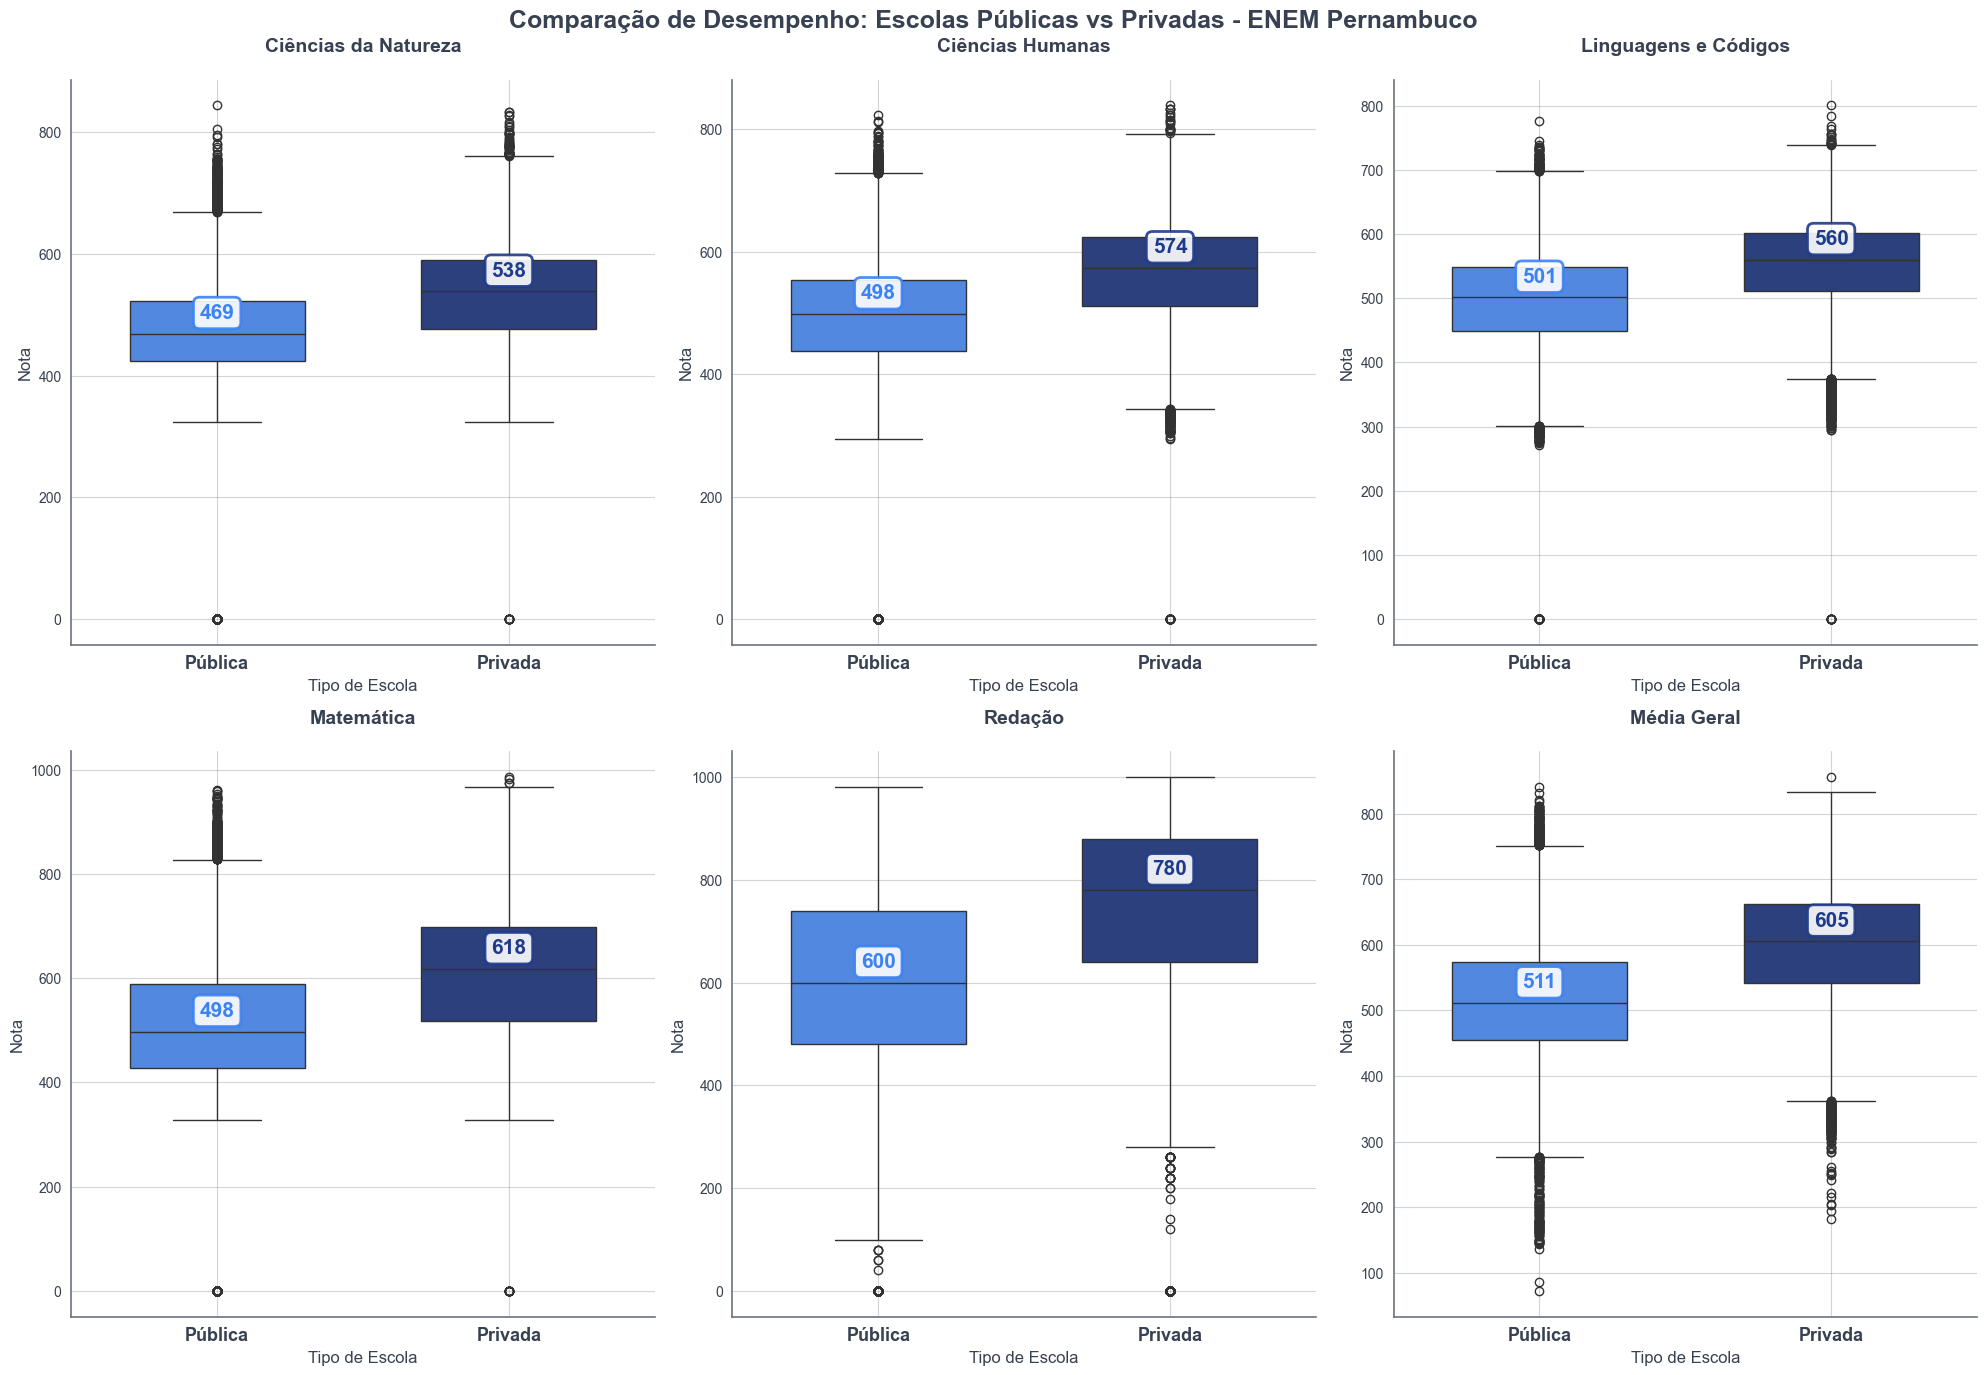

In [91]:
# Visualização das diferenças por matéria
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
axes = axes.flatten()

materias = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NOTA_MEDIA']
titulos = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 
           'Matemática', 'Redação', 'Média Geral']

# Cores para escolas
cores_escolas = {
    'Pública': CORES_PRINCIPAIS['azul_medio'], 
    'Privada': CORES_PRINCIPAIS['azul_principal']
}

for i, (materia, titulo) in enumerate(zip(materias, titulos)):
    ax = axes[i]
    
    if materia == 'NU_NOTA_REDACAO':
        data_plot = df_pub_priv.dropna(subset=[materia])
    else:
        data_plot = df_pub_priv
    
    # Criar boxplot personalizado
    box_plot = sns.boxplot(data=data_plot, x='TIPO_ESCOLA', y=materia, ax=ax,
                          palette=[cores_escolas['Pública'], cores_escolas['Privada']],
                          width=0.6)
    
    # Personalizar boxplot
    for patch, escola in zip(box_plot.artists, ['Pública', 'Privada']):
        patch.set_facecolor(cores_escolas[escola])
        patch.set_alpha(0.7)
        patch.set_edgecolor(CORES_PRINCIPAIS['cinza_escuro'])
        patch.set_linewidth(1.5)
    
    aplicar_estilo_grafico(ax, titulo=titulo, xlabel='Tipo de Escola', ylabel='Nota')

    # Aumentar fonte das labels
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, fontweight='bold', color=CORES_PRINCIPAIS['cinza_escuro'])
    
    # Adicionar medianas com estilo melhorado
    medianas = data_plot.groupby('TIPO_ESCOLA')[materia].median()
    for j, (escola, mediana) in enumerate(sorted(medianas.items(), reverse=True)):
        
        # Texto da mediana
        ax.text(j, mediana + (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.02, 
               f'{mediana:.0f}', ha='center', va='bottom', 
               fontweight='bold', fontsize=15, 
               color=cores_escolas[escola],
               bbox=dict(boxstyle="round,pad=0.3", facecolor='white', 
                        edgecolor=cores_escolas[escola], linewidth=2, alpha=0.9))

# Adicionar título geral
plt.suptitle('Comparação de Desempenho: Escolas Públicas vs Privadas - ENEM Pernambuco', 
            fontsize=18, fontweight='bold', y=0.98, color=CORES_PRINCIPAIS['cinza_escuro'])

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

### 🏆 Bloco 11 - Comparativo: Top 1% de Notas Médias nas Escolas Públicas por Faixa de Renda Familiar

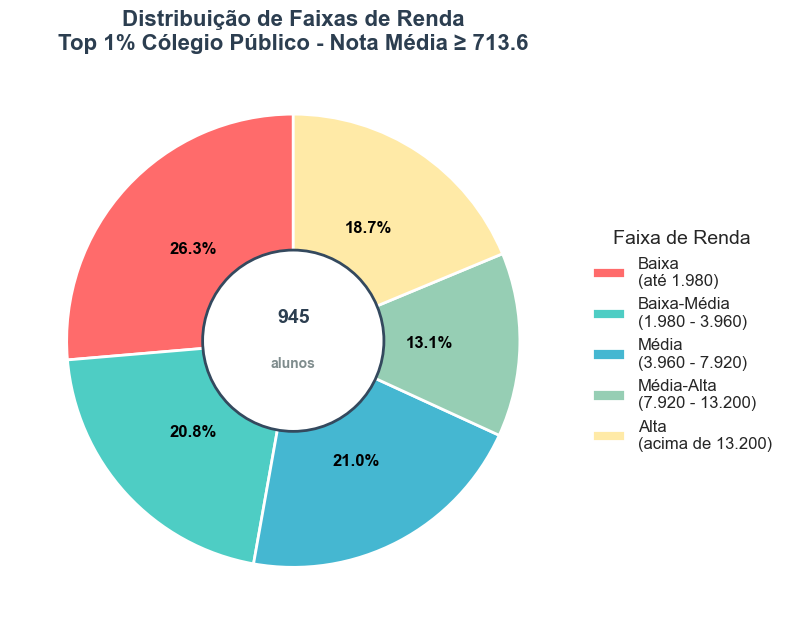

In [162]:
# Filtrar apenas escolas públicas com dados completos de renda
df_publicas_renda = df_pub_priv[
    (df_pub_priv['TIPO_ESCOLA'] == 'Pública')
].dropna(subset=['Q006', 'NOTA_MEDIA']).copy()

if len(df_publicas_renda) >= 100:
    
    # Mapear faixas de renda
    if 'RENDA_Q006' not in df_publicas_renda.columns:
        renda_q006_map = {
            'A': 'Nenhuma renda',
            'B': 'Até R$ 1.320',
            'C': 'R$ 1.320 - R$ 1.980',
            'D': 'R$ 1.980 - R$ 2.640',
            'E': 'R$ 2.640 - R$ 3.300',
            'F': 'R$ 3.300 - R$ 3.960',
            'G': 'R$ 3.960 - R$ 5.280',
            'H': 'R$ 5.280 - R$ 6.600',
            'I': 'R$ 6.600 - R$ 7.920',
            'J': 'R$ 7.920 - R$ 9.240',
            'K': 'R$ 9.240 - R$ 10.560',
            'L': 'R$ 10.560 - R$ 13.200',
            'M': 'R$ 13.200 - R$ 15.840',
            'N': 'R$ 15.840 - R$ 19.800',
            'O': 'R$ 19.800 - R$ 26.400',
            'P': 'R$ 26.400 - R$ 39.600',
            'Q': 'Mais de R$ 39.600'
        }
        df_publicas_renda['RENDA_Q006'] = df_publicas_renda['Q006'].map(renda_q006_map)
    
    # Agrupar faixas de renda em categorias amplas
    def agrupar_renda_top10(renda_codigo):
        if renda_codigo in ['A', 'B', 'C']:
            return 'Baixa\n(até 1.980)'
        elif renda_codigo in ['D', 'E', 'F']:
            return 'Baixa-Média\n(1.980 - 3.960)'
        elif renda_codigo in ['G', 'H', 'I']:
            return 'Média\n(3.960 - 7.920)'
        elif renda_codigo in ['J', 'K', 'L']:
            return 'Média-Alta\n(7.920 - 13.200)'
        else:
            return 'Alta\n(acima de 13.200)'
    
    df_publicas_renda['RENDA_AGRUPADA'] = df_publicas_renda['Q006'].apply(agrupar_renda_top10)
    
    # Selecionar Top 1% pela Nota Média
    percentil_99 = df_publicas_renda['NOTA_MEDIA'].quantile(0.99)
    top_10_percent = df_publicas_renda[df_publicas_renda['NOTA_MEDIA'] >= percentil_99]
    
    # Distribuição de renda dos top 1%
    distribuicao_renda = top_10_percent['RENDA_AGRUPADA'].value_counts()
    
    # Paleta de cores
    cores_renda = {
        'Baixa\n(até 1.980)': '#FF6B6B',
        'Baixa-Média\n(1.980 - 3.960)': '#4ECDC4',
        'Média\n(3.960 - 7.920)': '#45B7D1',
        'Média-Alta\n(7.920 - 13.200)': '#96CEB4',
        'Alta\n(acima de 13.200)': '#FFEAA7'
    }
    
    # Definir ordem desejada
    ordem_renda = ['Baixa\n(até 1.980)', 'Baixa-Média\n(1.980 - 3.960)',
                   'Média\n(3.960 - 7.920)', 'Média-Alta\n(7.920 - 13.200)',
                   'Alta\n(acima de 13.200)']
    
    # Filtrar apenas categorias presentes nos dados
    categorias_presentes = [cat for cat in ordem_renda if cat in distribuicao_renda.index]
    valores_presentes = [distribuicao_renda[cat] for cat in categorias_presentes]
    
    # Criar gráfico de pizza único
    fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')
    
    wedges, _, autotexts = ax.pie(
        valores_presentes,
        labels=None,  # remove os labels do gráfico
        colors=[cores_renda[cat] for cat in categorias_presentes],
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(width=0.8, edgecolor='white', linewidth=2),
        textprops={'fontsize': 12, 'fontweight': 'bold', 'color':'black'}
    )
    
    # Círculo central para estilo donut
    centre_circle = plt.Circle((0,0), 0.4, fc='white', linewidth=2, edgecolor='#34495E')
    ax.add_artist(centre_circle)
    
    # Informações no centro
    ax.text(0, 0.1, f'{len(top_10_percent):,}', ha='center', va='center', fontsize=14, fontweight='bold', color='#2C3E50')
    ax.text(0, -0.1, 'alunos', ha='center', va='center', fontsize=10, fontweight='bold', color='#7F8C8D')
    
    # Título
    ax.set_title(f'Distribuição de Faixas de Renda\nTop 1% Cólegio Público - Nota Média ≥ {percentil_99:.1f}', 
                 fontsize=16, fontweight='bold', color='#2C3E50')
    
    # Legenda externa ordenada
    ax.legend(
        wedges, 
        categorias_presentes,
        title="Faixa de Renda",
        title_fontsize=14,  # título maior
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
        fontsize=12,
        frameon=False  # remove fundo cinza
    )
    
    plt.tight_layout()
    plt.show()
    
else:
    print("⚠️ Dados insuficientes para análise dos top 5%")


### 📈 Bloco 12 - Evolução Temporal

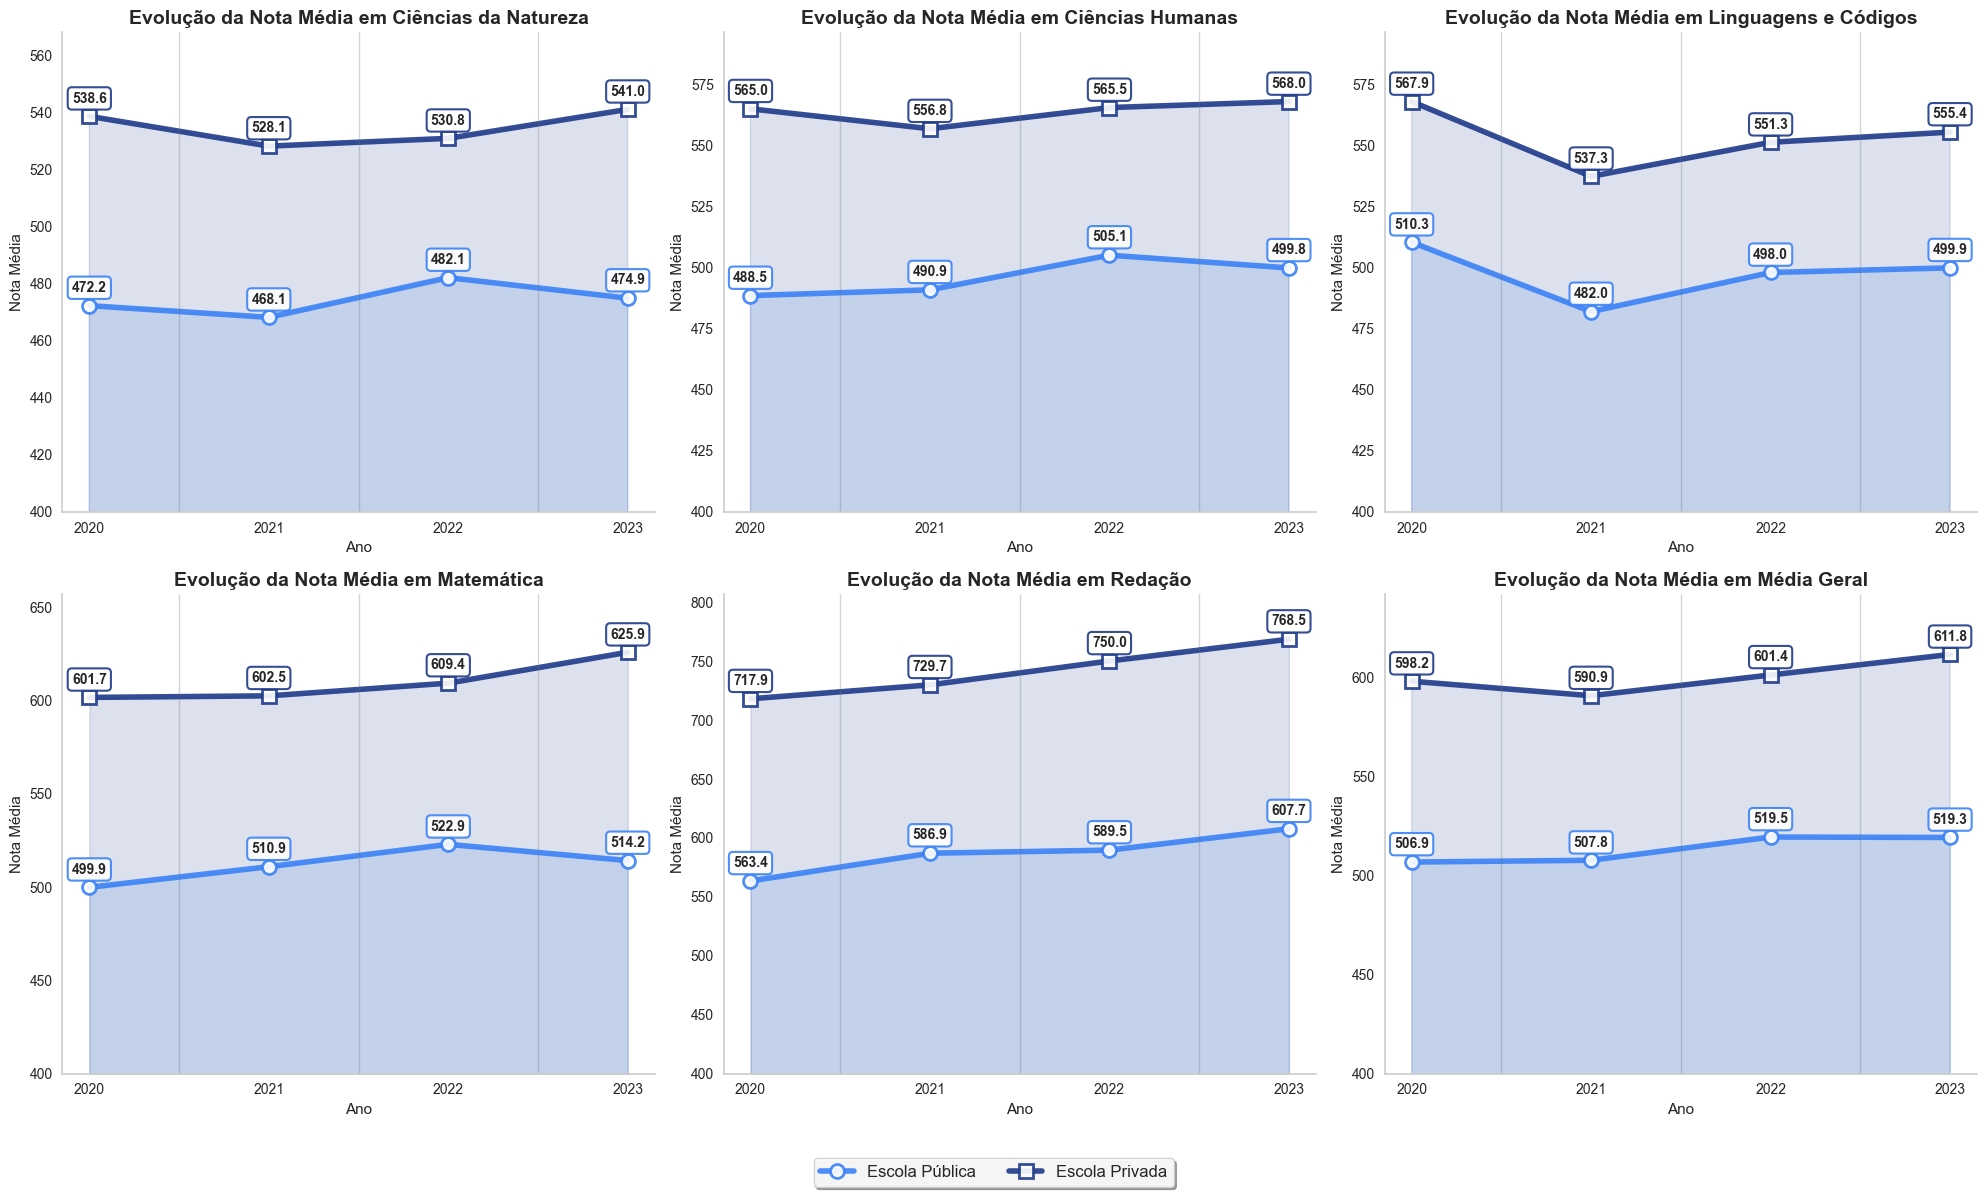

In [163]:
# Cores e estilos
cores_evolucao = {
    'Pública': CORES_PRINCIPAIS['azul_medio'], 
    'Privada': CORES_PRINCIPAIS['azul_principal']
}
marcadores = {'Pública': 'o', 'Privada': 's'}

# Número de matérias
num_materias = len(materias)

# Criar figura com subplots (2 linhas, 3 colunas)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()  # facilita iterar sobre os eixos

# Loop para gerar cada gráfico em seu subplot
for i, (materia, titulo) in enumerate(zip(materias, titulos)):
    ax = axes[i]

    # Calcular evolução por ano e tipo de escola
    evolucao = df_pub_priv.groupby(['NU_ANO', 'TIPO_ESCOLA'])[materia].mean().reset_index()

    for escola in ['Pública', 'Privada']:
        data_escola = evolucao[evolucao['TIPO_ESCOLA'] == escola]

        # Linha principal
        ax.plot(
            data_escola['NU_ANO'], data_escola[materia],
            marker=marcadores[escola],
            linewidth=4, markersize=10,
            label=f'Escola {escola}',
            color=cores_evolucao[escola],
            markerfacecolor='white', markeredgecolor=cores_evolucao[escola],
            markeredgewidth=2, alpha=0.9
        )

        # Área sob a curva
        ax.fill_between(
            data_escola['NU_ANO'], data_escola[materia],
            alpha=0.15, color=cores_evolucao[escola]
        )

        # Anotar valores
        for _, row in data_escola.iterrows():
            ax.annotate(
                f'{row[materia]:.1f}',
                (row['NU_ANO'], row[materia]),
                textcoords="offset points", xytext=(0, 10), ha='center',
                fontweight='bold', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white',
                          edgecolor=cores_evolucao[escola], linewidth=1.5, alpha=0.9)
            )

    # Título do subplot e estilo
    ax.set_title(f'Evolução da Nota Média em {titulo}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Ano', fontsize=11)
    ax.set_ylabel('Nota Média', fontsize=11)

    # Definir base do eixo Y
    ax.set_ylim(bottom=400)

    ax.grid(False)

    # Eixos X
    anos = sorted(df['NU_ANO'].unique())
    ax.set_xticks(anos)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

    # Separadores verticais
    for ano in anos[1:]:
        ax.axvline(
            x=ano - 0.5,
            color=CORES_PRINCIPAIS['cinza_medio'],
            alpha=0.3, linestyle='-', linewidth=1
        )

# Legenda compartilhada no canto inferior direito
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=12, frameon=True, framealpha=0.9)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # deixar espaço para a legenda
plt.show()


### 🌈 Bloco 12 - Análise por Cor/Raça

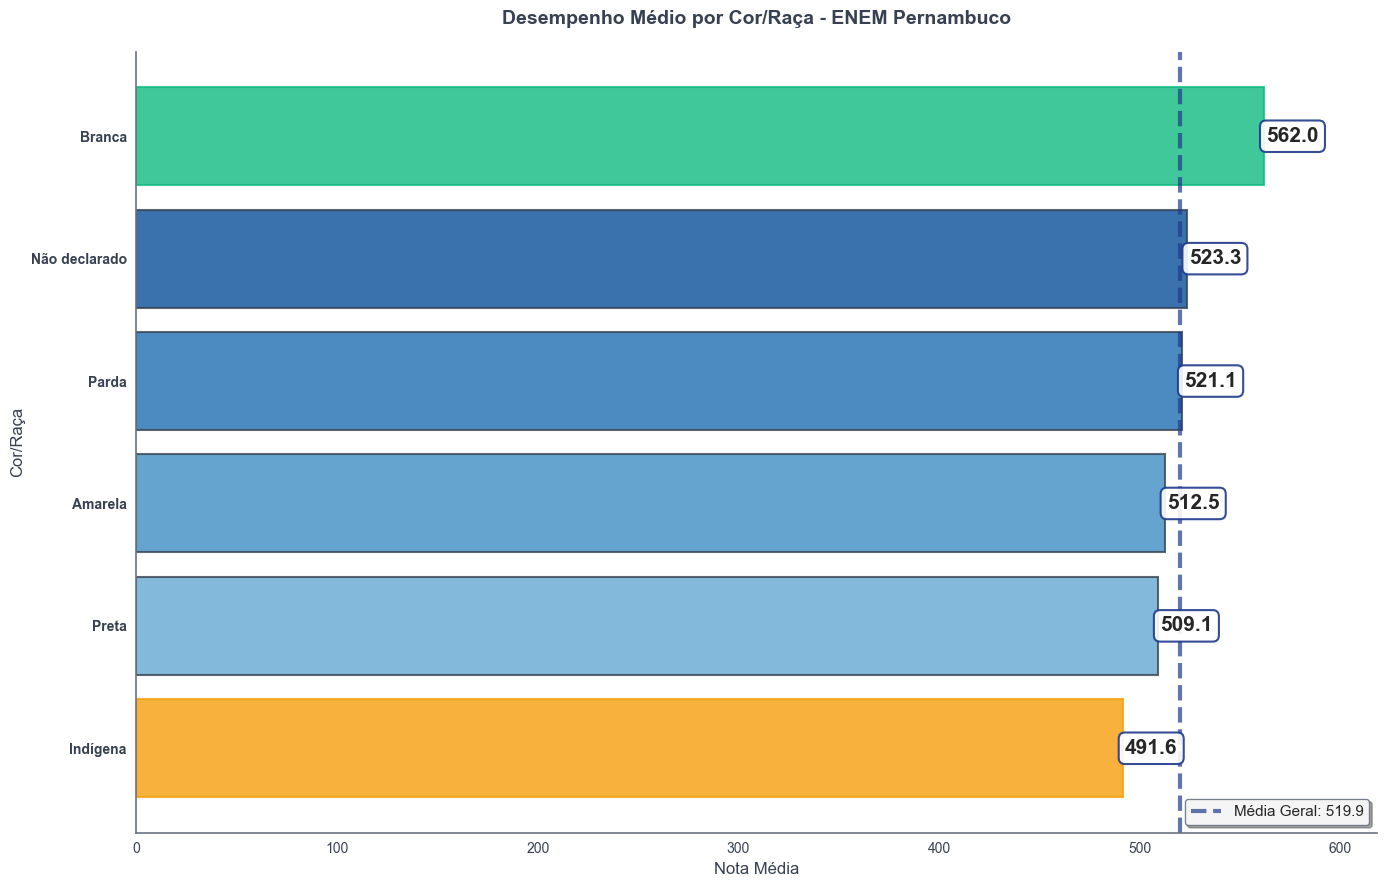

In [165]:
# Desempenho por cor/raça
desempenho_raca = df_pub_priv.groupby('COR_RACA')['NOTA_MEDIA'].mean().sort_values(ascending=False)

# Visualização do desempenho por cor/raça com estilo melhorado
plt.figure(figsize=(14, 9))
ax = plt.gca()

desempenho_raca_asc = desempenho_raca.sort_values(ascending=True)

# Criar gradiente de cores baseado no desempenho
n_racas = len(desempenho_raca_asc)
cores_gradiente = [plt.cm.Blues(0.4 + 0.6 * i / (n_racas-1)) for i in range(n_racas)]

bars = ax.barh(range(len(desempenho_raca_asc)), desempenho_raca_asc.values, 
               color=cores_gradiente, alpha=0.8, 
               edgecolor=CORES_PRINCIPAIS['cinza_escuro'], linewidth=1.5)

aplicar_estilo_grafico(ax, 
                      titulo='Desempenho Médio por Cor/Raça - ENEM Pernambuco',
                      xlabel='Nota Média', 
                      ylabel='Cor/Raça')

# Configurar eixo Y
ax.set_yticks(range(len(desempenho_raca_asc)))
ax.set_yticklabels(desempenho_raca_asc.index, fontweight='bold')

# Adicionar valores nas barras com estilo
for i, (bar, valor) in enumerate(zip(bars, desempenho_raca_asc.values)):
    ax.text(valor + 1, bar.get_y() + bar.get_height()/2, 
            f'{valor:.1f}', va='center', ha='left', 
            fontweight='bold', fontsize=15,
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', 
                     edgecolor=CORES_PRINCIPAIS['azul_principal'], 
                     linewidth=1.5, alpha=0.9))

# Destacar a maior e menor média
idx_max = len(desempenho_raca_asc) - 1
idx_min = 0
bars[idx_max].set_color(CORES_PRINCIPAIS['verde_sucesso'])
bars[idx_min].set_color(CORES_PRINCIPAIS['laranja_alerta'])

# Adicionar linha da média geral
media_geral = desempenho_raca_asc.mean()
ax.axvline(x=media_geral, color=CORES_PRINCIPAIS['azul_principal'], 
          linestyle='--', linewidth=3, alpha=0.7, 
          label=f'Média Geral: {media_geral:.1f}')

# Configurar legend
ax.legend(loc='lower right', fontsize=11, framealpha=0.9,
         edgecolor=CORES_PRINCIPAIS['cinza_medio'])

# Ajustar limites
ax.set_xlim(0, max(desempenho_raca_asc.values) * 1.1)
ax.grid(False)

plt.tight_layout()
plt.show()

### 💰 Bloco 13 - Análise de Renda Familiar vs Desempenho por Prova

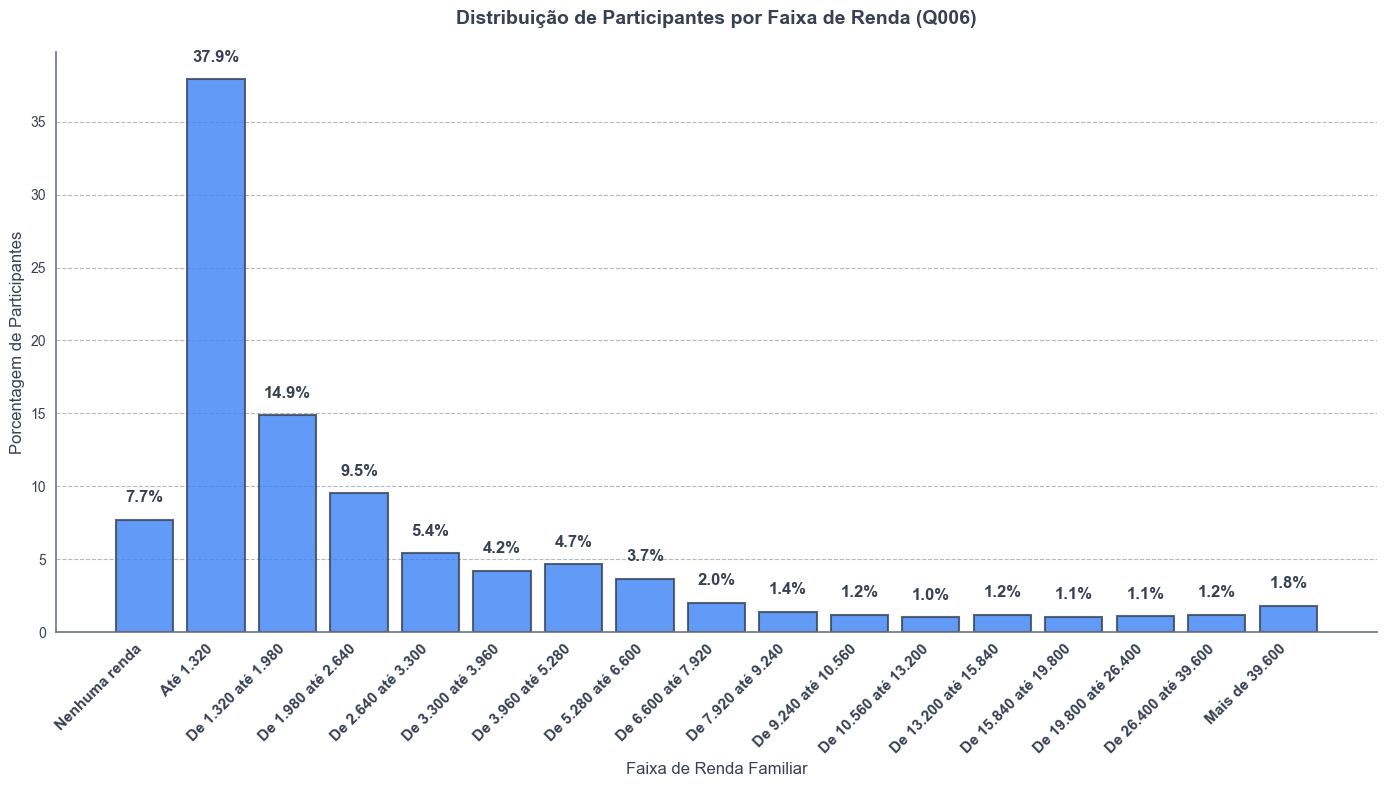

In [166]:
# Mapeamento da Q006 (Renda familiar mensal)
renda_q006_map = {
    'A': 'Nenhuma renda',
    'B': 'Até 1.320',
    'C': 'De 1.320 até 1.980',
    'D': 'De 1.980 até 2.640',
    'E': 'De 2.640 até 3.300',
    'F': 'De 3.300 até 3.960',
    'G': 'De 3.960 até 5.280',
    'H': 'De 5.280 até 6.600',
    'I': 'De 6.600 até 7.920',
    'J': 'De 7.920 até 9.240',
    'K': 'De 9.240 até 10.560',
    'L': 'De 10.560 até 13.200',
    'M': 'De 13.200 até 15.840',
    'N': 'De 15.840 até 19.800',
    'O': 'De 19.800 até 26.400',
    'P': 'De 26.400 até 39.600',
    'Q': 'Mais de 39.600'
}

# Aplicar mapeamento e criar ordem numérica
df_pub_priv['RENDA_Q006'] = df_pub_priv['Q006'].map(renda_q006_map)
renda_ordem_q006 = {letra: i for i, letra in enumerate('ABCDEFGHIJKLMNOPQ')}
df_pub_priv['RENDA_Q006_ORDEM'] = df_pub_priv['Q006'].map(renda_ordem_q006)

# Filtrar dados com renda válida
df_renda_valida = df_pub_priv.dropna(subset=['Q006', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']).copy()

# Distribuição por faixa de renda
dist_renda = df_renda_valida['RENDA_Q006'].value_counts().reindex([renda_q006_map[letra] for letra in 'ABCDEFGHIJKLMNOPQ' if renda_q006_map[letra] in df_renda_valida['RENDA_Q006'].values])
for faixa, count in dist_renda.items():  # Mostrar top 10
    pct = count / len(df_renda_valida) * 100

# Ordenar faixas de renda existentes
faixas_renda = [renda_q006_map[letra] for letra in 'ABCDEFGHIJKLMNOPQ' 
                if renda_q006_map[letra] in df_renda_valida['RENDA_Q006'].values]

# Contagem de participantes por faixa de renda
dist_renda = df_renda_valida['RENDA_Q006'].value_counts().reindex(faixas_renda)

# Converter para porcentagem
dist_renda_pct = (dist_renda / dist_renda.sum()) * 100

# Criar figura e eixo
fig, ax = plt.subplots(figsize=(14, 8))

# Plotar barras
bars = ax.bar(dist_renda_pct.index, dist_renda_pct.values, 
              color=PALETA_AZUL[1], 
              edgecolor=CORES_PRINCIPAIS['cinza_escuro'], 
              linewidth=1.5, alpha=0.8)

# Adicionar valores no topo das barras em porcentagem
for bar, pct in zip(bars, dist_renda_pct.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{pct:.1f}%', ha='center', va='bottom', 
            fontweight='bold', fontsize=12, color=CORES_PRINCIPAIS['cinza_escuro'])

# Aplicar estilo personalizado
aplicar_estilo_grafico(ax, 
                       titulo='Distribuição de Participantes por Faixa de Renda (Q006)',
                       xlabel='Faixa de Renda Familiar', 
                       ylabel='Porcentagem de Participantes')

# Ajustes nos rótulos do eixo X
plt.xticks(rotation=45, ha='right', fontsize=11, fontweight='bold')

# Grid apenas horizontal
ax.yaxis.grid(True, linestyle='--', alpha=0.5)
ax.xaxis.grid(False)

plt.tight_layout()
plt.show()


### 📊 Bloco 14 - Matriz de Correlação: Notas vs Renda Familiar

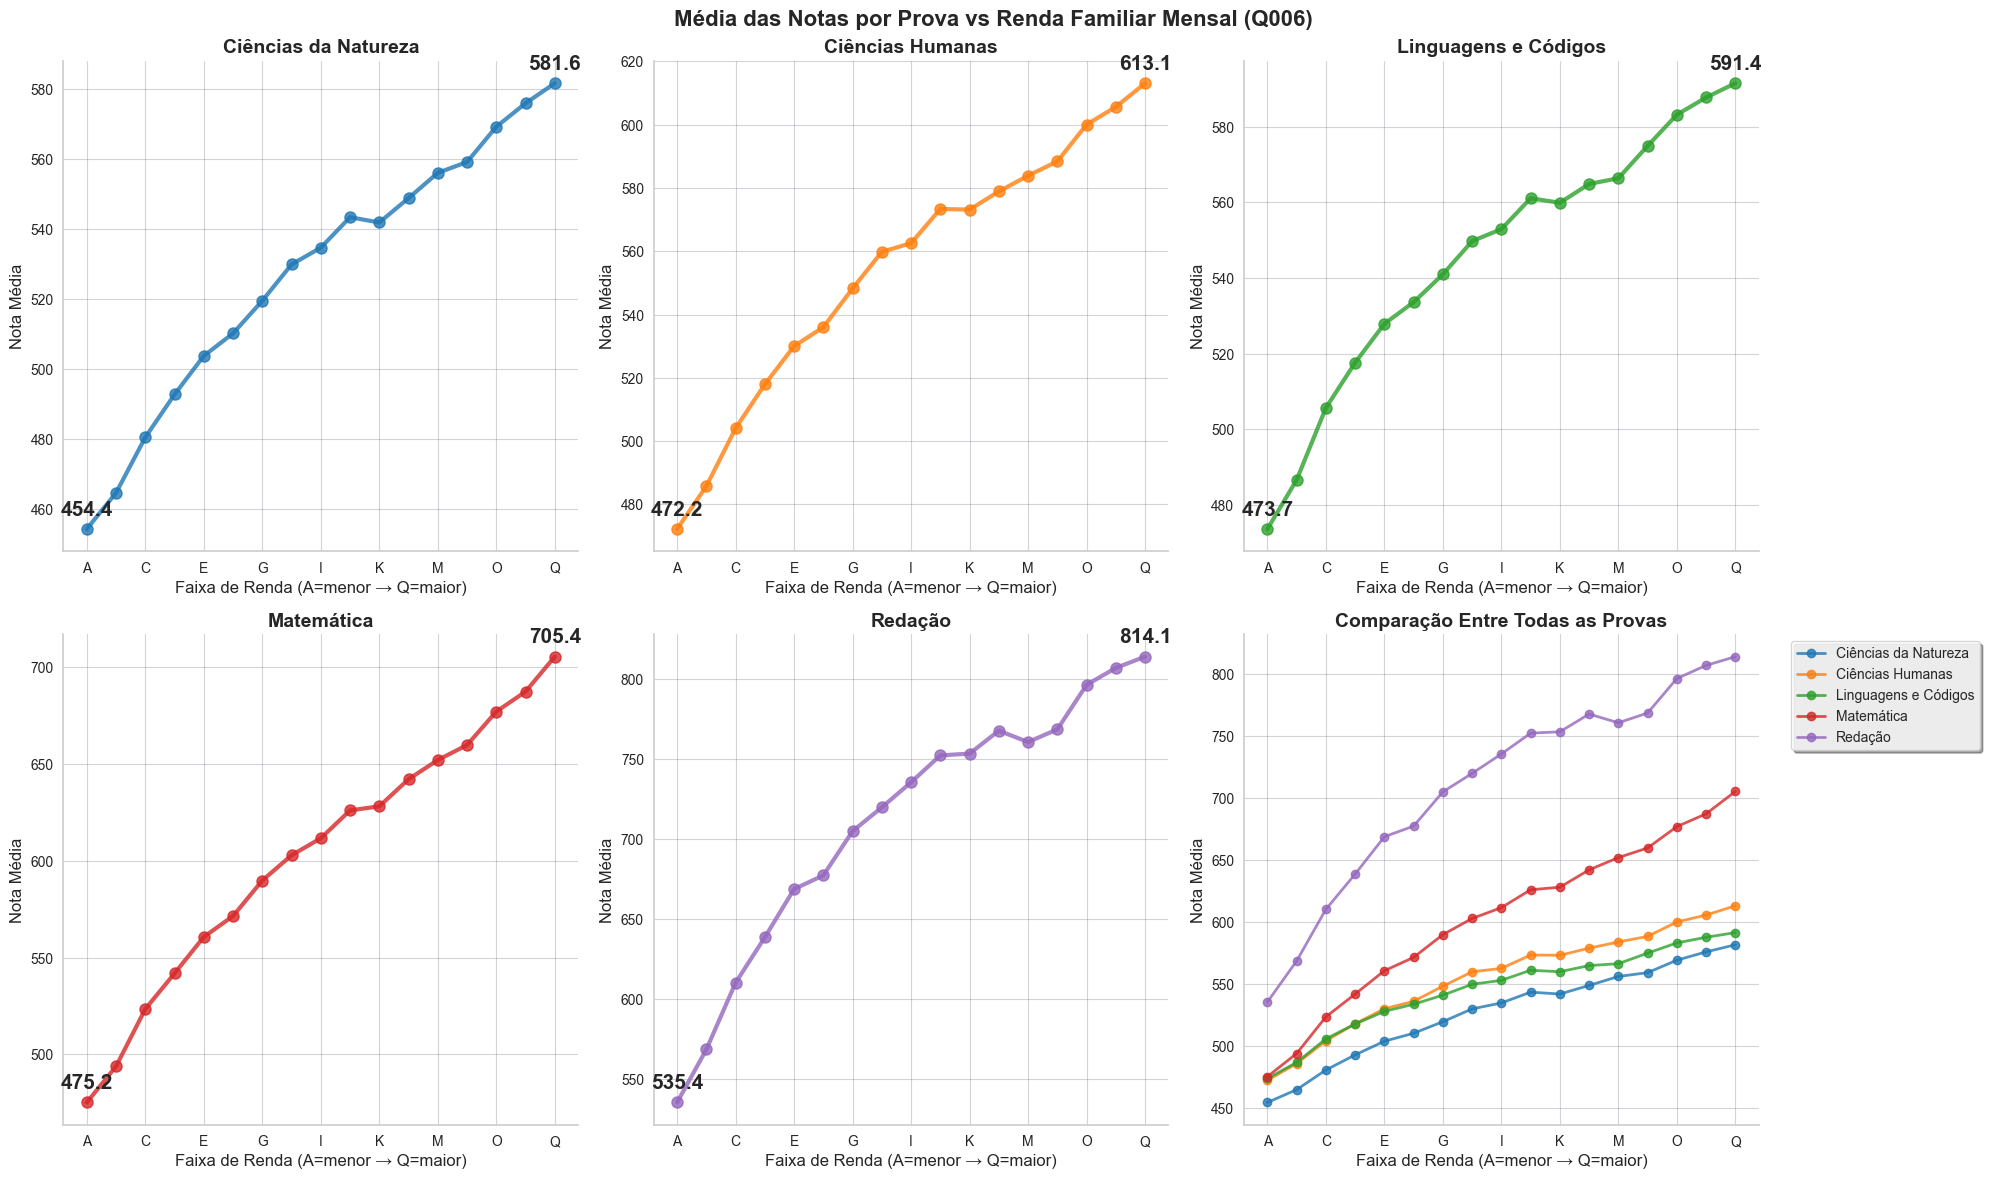


🔍 Análise dos Extremos de Renda:

📊 Renda Baixa (A-C): 75,061 participantes
📊 Renda Alta (O-Q): 5,139 participantes
  Ciências da Natureza: 467.3 vs 576.6 (diferença: +109.3 pontos, +23.4%)
  Ciências Humanas: 488.5 vs 607.4 (diferença: +118.9 pontos, +24.3%)
  Linguagens e Códigos: 489.7 vs 588.1 (diferença: +98.4 pontos, +20.1%)
  Matemática: 498.8 vs 692.5 (diferença: +193.8 pontos, +38.8%)
  Redação: 574.6 vs 807.4 (diferença: +232.8 pontos, +40.5%)


In [167]:
# Distribuição por faixa de renda
dist_renda = df_renda_valida['RENDA_Q006'].value_counts().reindex([renda_q006_map[letra] for letra in 'ABCDEFGHIJKLMNOPQ' if renda_q006_map[letra] in df_renda_valida['RENDA_Q006'].values])
for faixa, count in dist_renda.items():  # Mostrar top 10
    pct = count / len(df_renda_valida) * 100

if len(df_renda_valida) > 100:  # Verificar se há dados suficientes
    # Calcular médias por faixa de renda para cada prova
    provas_cols = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
    provas_nomes = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']
    
    # Agrupar por ordem de renda e calcular médias
    medias_por_renda = df_renda_valida.groupby('RENDA_Q006_ORDEM')[provas_cols].mean()
    
    # Criar o gráfico
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    
    cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    for i, (prova_col, prova_nome, cor) in enumerate(zip(provas_cols, provas_nomes, cores)):
        ax = axes[i]
        
        # Filtrar dados válidos para esta prova específica
        if prova_col == 'NU_NOTA_REDACAO':
            dados_prova = df_renda_valida.dropna(subset=[prova_col])
        else:
            dados_prova = df_renda_valida
            
        if len(dados_prova) > 0:
            medias_prova = dados_prova.groupby('RENDA_Q006_ORDEM')[prova_col].mean()
            
            # Plotar linha
            ax.plot(medias_prova.index, medias_prova.values, 
                   marker='o', linewidth=3, markersize=8, color=cor, alpha=0.8)
            
            # Configurar eixos e título
            ax.set_title(f'{prova_nome}', fontsize=14, fontweight='bold')
            ax.set_xlabel('Faixa de Renda (A=menor → Q=maior)', fontsize=12)
            ax.set_ylabel('Nota Média', fontsize=12)
            ax.grid(True, alpha=0.3)
            
            # Definir ticks do eixo x
            ax.set_xticks(range(0, 17, 2))  # A cada 2 letras
            ax.set_xticklabels(['A', 'C', 'E', 'G', 'I', 'K', 'M', 'O', 'Q'])
            
            # Adicionar valores nos extremos
            if len(medias_prova) > 0:
                min_idx, max_idx = medias_prova.index.min(), medias_prova.index.max()
                min_val, max_val = medias_prova.iloc[0], medias_prova.iloc[-1]
                ax.annotate(f'{min_val:.1f}', (min_idx, min_val), 
                           textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize=15)
                ax.annotate(f'{max_val:.1f}', (max_idx, max_val), 
                           textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize=15)
    
    # Gráfico adicional: Comparação geral
    ax_comp = axes[5]
    for i, (prova_col, prova_nome, cor) in enumerate(zip(provas_cols, provas_nomes, cores)): 
        medias_prova = df_renda_valida.groupby('RENDA_Q006_ORDEM')[prova_col].mean()
        ax_comp.plot(medias_prova.index, medias_prova.values, 
                    marker='o', linewidth=2, markersize=6, label=prova_nome, alpha=0.8, color=cor)
    
    ax_comp.set_title('Comparação Entre Todas as Provas', fontsize=14, fontweight='bold')
    ax_comp.set_xlabel('Faixa de Renda (A=menor → Q=maior)', fontsize=12)
    ax_comp.set_ylabel('Nota Média', fontsize=12)
    ax_comp.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax_comp.grid(True, alpha=0.3)
    ax_comp.set_xticks(range(0, 17, 2))
    ax_comp.set_xticklabels(['A', 'C', 'E', 'G', 'I', 'K', 'M', 'O', 'Q'])
    
    plt.suptitle('Média das Notas por Prova vs Renda Familiar Mensal (Q006)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Análise dos extremos
    print("\n🔍 Análise dos Extremos de Renda:")
    renda_baixa = df_renda_valida[df_renda_valida['RENDA_Q006_ORDEM'] <= 2]  # Faixas A, B, C
    renda_alta = df_renda_valida[df_renda_valida['RENDA_Q006_ORDEM'] >= 14]  # Faixas O, P, Q
    
    if len(renda_baixa) > 0 and len(renda_alta) > 0:
        print(f"\n📊 Renda Baixa (A-C): {len(renda_baixa):,} participantes")
        print(f"📊 Renda Alta (O-Q): {len(renda_alta):,} participantes")
        
        for prova_col, prova_nome in zip(provas_cols, provas_nomes):
            if prova_col == 'NU_NOTA_REDACAO':
                baixa_dados = renda_baixa.dropna(subset=[prova_col])
                alta_dados = renda_alta.dropna(subset=[prova_col])
            else:
                baixa_dados = renda_baixa
                alta_dados = renda_alta
                
            if len(baixa_dados) > 0 and len(alta_dados) > 0:
                media_baixa = baixa_dados[prova_col].mean()
                media_alta = alta_dados[prova_col].mean()
                diferenca = media_alta - media_baixa
                pct_diferenca = (diferenca / media_baixa) * 100
                print(f"  {prova_nome}: {media_baixa:.1f} vs {media_alta:.1f} (diferença: +{diferenca:.1f} pontos, +{pct_diferenca:.1f}%)")

else:
    print("⚠️ Dados insuficientes para análise detalhada da renda familiar (Q006)")

### 🏫 Bloco 15 - Distribuição por Tipo de Escola em Faixas de Renda


🏫 DISTRIBUIÇÃO POR TIPO DE ESCOLA EM CADA FAIXA DE RENDA
------------------------------------------------------------


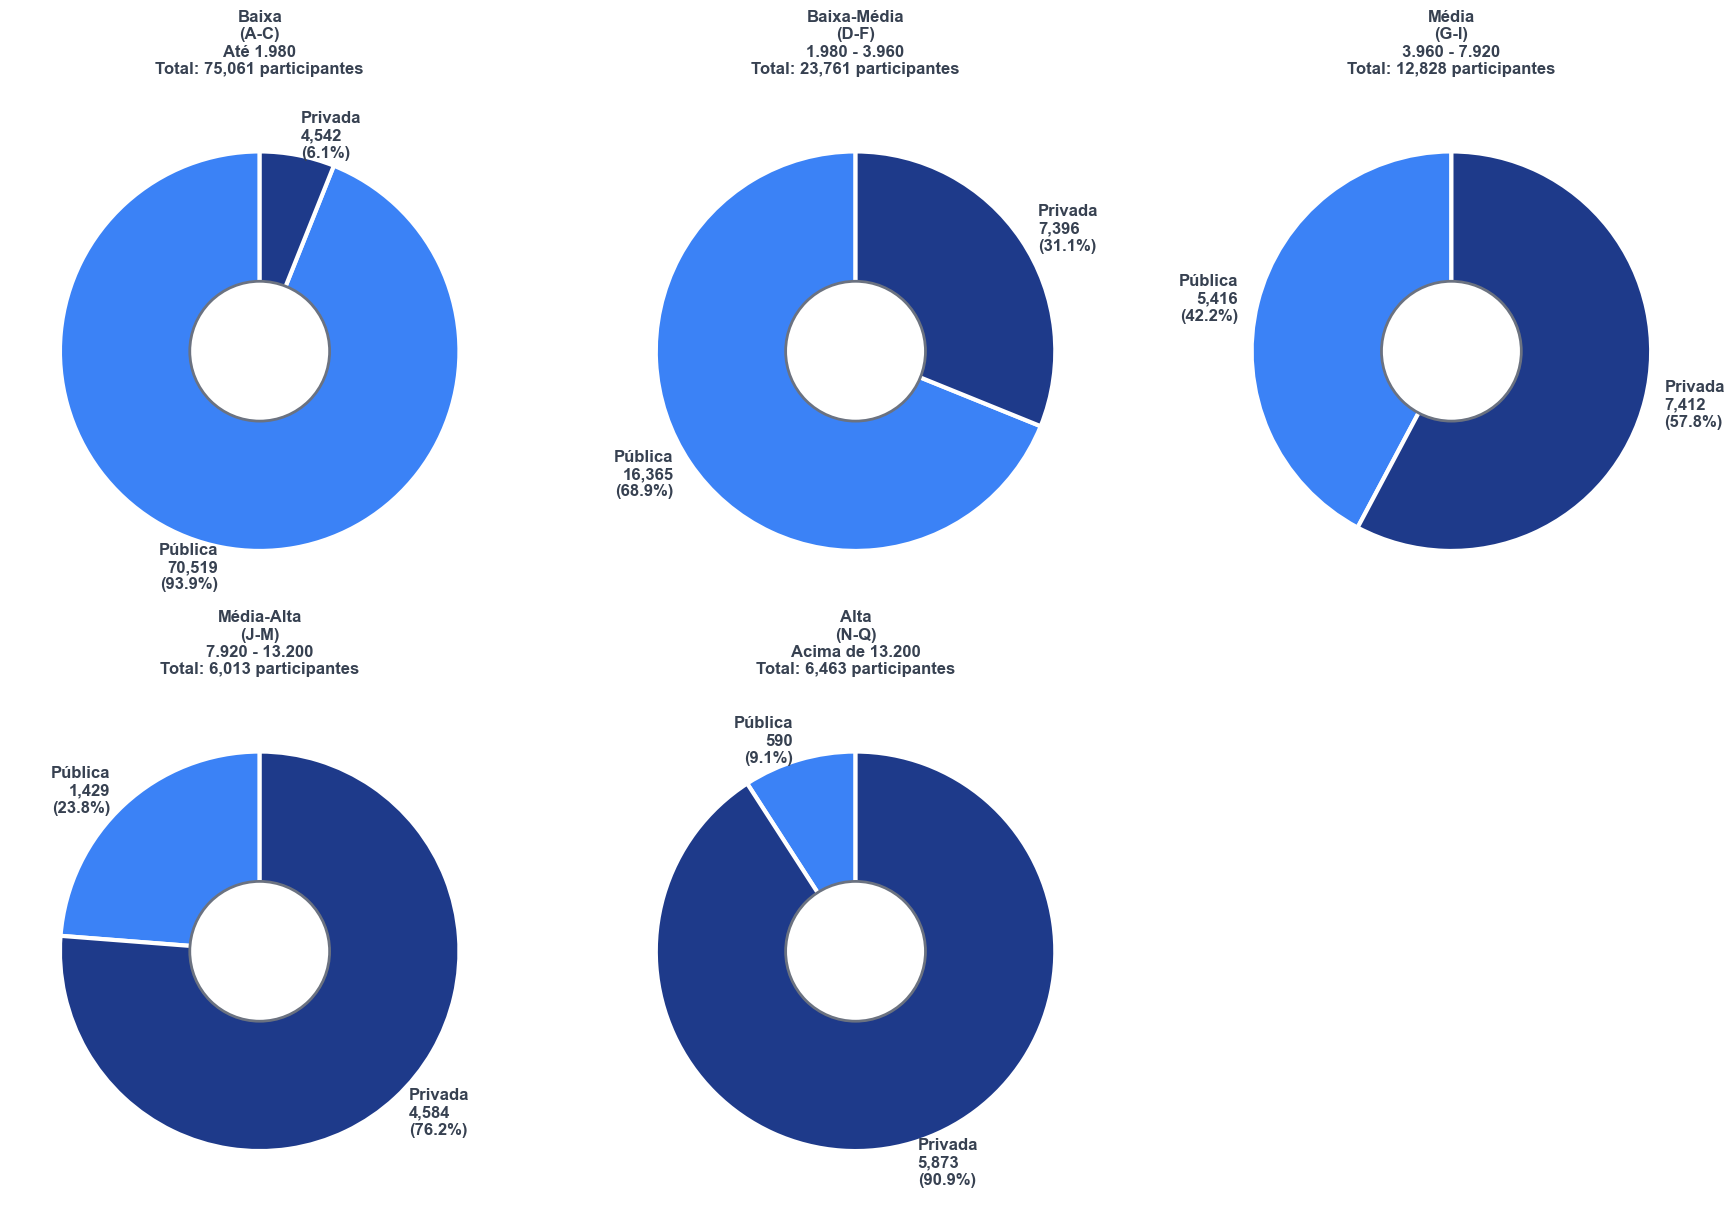

In [141]:
print("\n🏫 DISTRIBUIÇÃO POR TIPO DE ESCOLA EM CADA FAIXA DE RENDA")
print("-" * 60)

# Verificar se temos dados válidos
if len(df_renda_valida) > 100:
    
    # Agrupar faixas de renda para melhor visualização
    def agrupar_faixas_renda(renda_ordem):
        if renda_ordem <= 2:  # A, B, C
            return 'Baixa\n(A-C)\nAté 1.980'
        elif renda_ordem <= 5:  # D, E, F
            return 'Baixa-Média\n(D-F)\n1.980 - 3.960'
        elif renda_ordem <= 8:  # G, H, I
            return 'Média\n(G-I)\n3.960 - 7.920'
        elif renda_ordem <= 12:  # J, K, L
            return 'Média-Alta\n(J-M)\n7.920 - 13.200'
        else:  # M, N, O, P, Q
            return 'Alta\n(N-Q)\nAcima de 13.200'
    
    # Aplicar agrupamento
    df_renda_valida['FAIXA_RENDA_AGRUPADA'] = df_renda_valida['RENDA_Q006_ORDEM'].apply(agrupar_faixas_renda)
    
    # Calcular distribuição
    distribuicao = df_renda_valida.groupby(['FAIXA_RENDA_AGRUPADA', 'TIPO_ESCOLA']).size().unstack(fill_value=0)
    
    # Definir ordem das faixas
    ordem_faixas = ['Baixa\n(A-C)\nAté 1.980', 'Baixa-Média\n(D-F)\n1.980 - 3.960', 
                   'Média\n(G-I)\n3.960 - 7.920', 'Média-Alta\n(J-M)\n7.920 - 13.200', 
                   'Alta\n(N-Q)\nAcima de 13.200']
    
    # Filtrar apenas faixas que existem nos dados
    faixas_existentes = [faixa for faixa in ordem_faixas if faixa in distribuicao.index]
    
    # Criar figura com subplots
    n_faixas = len(faixas_existentes)
    n_cols = 3
    n_rows = (n_faixas + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1) if n_faixas > 1 else [axes]
    elif n_faixas == 1:
        axes = axes.reshape(-1)
    
    # Cores consistentes para tipos de escola
    cores_escola = {
        'Pública': CORES_PRINCIPAIS['azul_medio'], 
        'Privada': CORES_PRINCIPAIS['azul_principal']
    }
    
    # Criar gráficos de pizza para cada faixa
    for i, faixa in enumerate(faixas_existentes):
        row = i // n_cols
        col = i % n_cols
        ax = axes[row, col] if n_rows > 1 else axes[col]
        
        # Dados para esta faixa
        dados_faixa = distribuicao.loc[faixa]
        total_faixa = dados_faixa.sum()
        
        if total_faixa > 0:
            # Preparar dados para pizza
            valores = []
            labels = []
            cores = []
            
            for tipo_escola in ['Pública', 'Privada']:
                if tipo_escola in dados_faixa.index and dados_faixa[tipo_escola] > 0:
                    valores.append(dados_faixa[tipo_escola])
                    labels.append(f'{tipo_escola}\n{dados_faixa[tipo_escola]:,}\n({dados_faixa[tipo_escola]/total_faixa*100:.1f}%)')
                    cores.append(cores_escola[tipo_escola])
            
            # Criar gráfico de pizza
            wedges, texts, autotexts = ax.pie(valores, labels=labels, colors=cores,
                                             autopct='', startangle=90,
                                             wedgeprops=dict(width=0.7, edgecolor='white', linewidth=3))
            
            # Estilizar textos
            for text in texts:
                text.set_fontweight('bold')
                text.set_fontsize(12)
                text.set_color(CORES_PRINCIPAIS['cinza_escuro'])
            
            # Adicionar título
            ax.set_title(f'{faixa}\nTotal: {total_faixa:,} participantes', 
                        fontsize=12, fontweight='bold', pad=20,
                        color=CORES_PRINCIPAIS['cinza_escuro'])
            
            # Adicionar círculo central para estilo donut
            centre_circle = plt.Circle((0,0), 0.35, fc='white', linewidth=2, 
                                     edgecolor=CORES_PRINCIPAIS['cinza_medio'])
            ax.add_artist(centre_circle)
        else:
            ax.text(0.5, 0.5, 'Sem\nDados', ha='center', va='center', 
                   transform=ax.transAxes, fontsize=14, fontweight='bold')
            ax.set_title(faixa, fontsize=12, fontweight='bold')
    
    # Remover subplots vazios
    total_subplots = n_rows * n_cols
    for i in range(len(faixas_existentes), total_subplots):
        row = i // n_cols
        col = i % n_cols
        if n_rows > 1:
            axes[row, col].axis('off')
        else:
            axes[col].axis('off')
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()

else:
    print("⚠️ Dados insuficientes para análise de distribuição por faixas de renda")
    print("   É necessário ter pelo menos 100 participantes com dados completos")

### 💻 Bloco 16 - Análise de Acesso a Tecnologias vs Desempenho

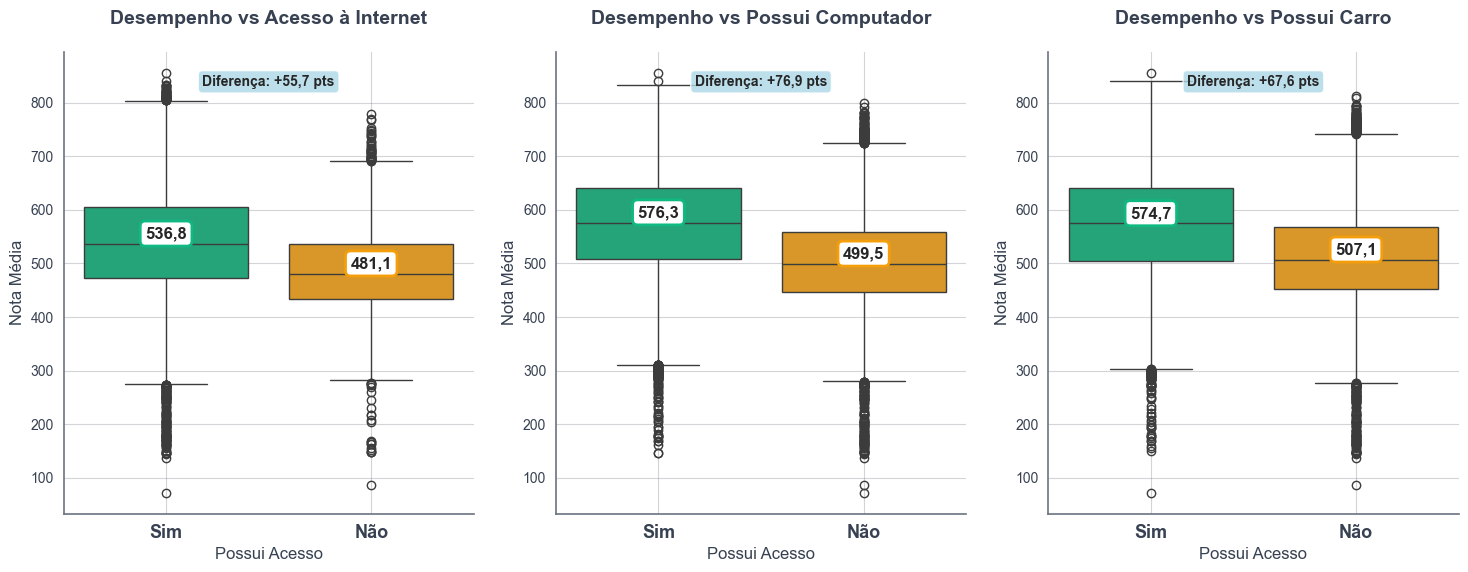

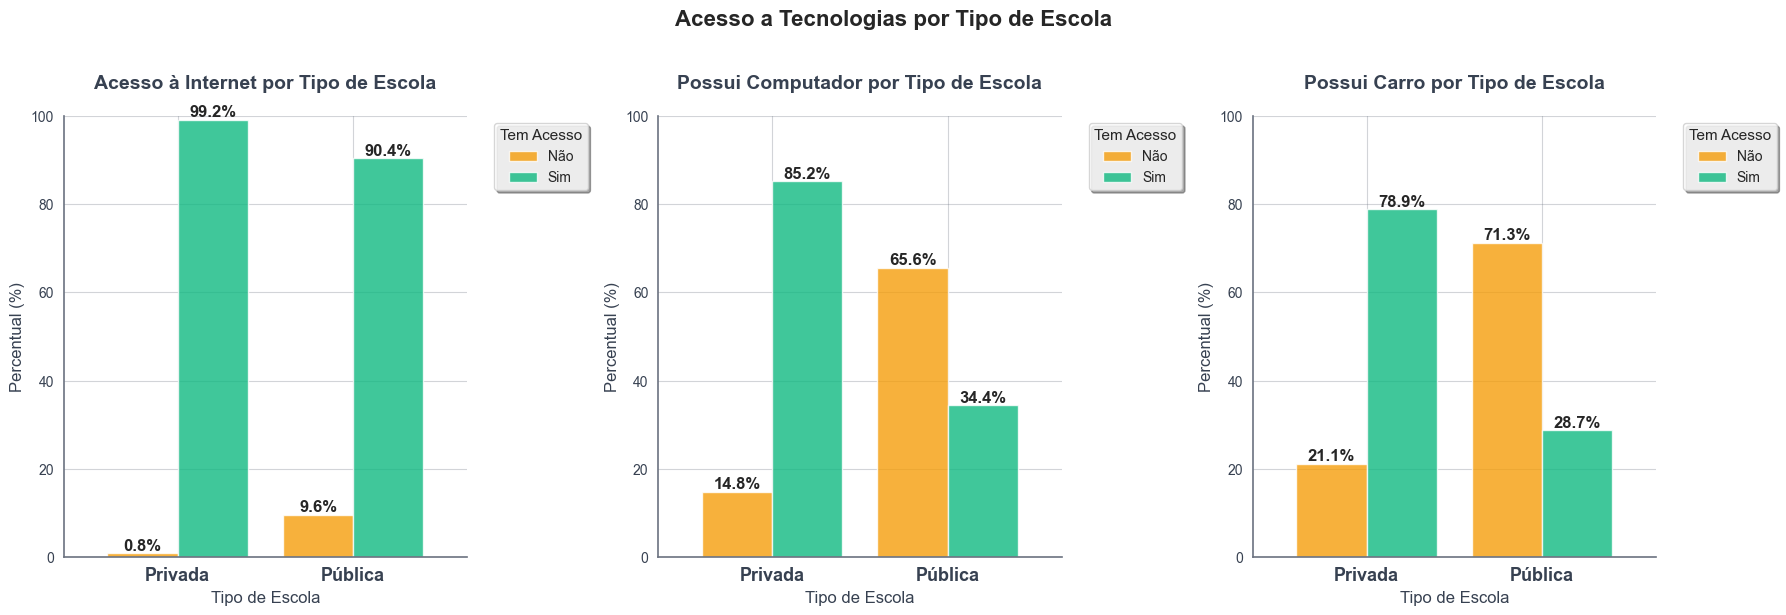

In [172]:
# Verificar disponibilidade das colunas de tecnologia
colunas_tecnologia = ['Q025', 'Q024', 'Q010']  # Internet, Computador, Carro
colunas_existentes = [col for col in colunas_tecnologia if col in df_pub_priv.columns]

if len(colunas_existentes) > 0:
    
    # Mapeamentos para as respostas (assumindo padrão A=Não, B=Sim)
    mapeamento_binario = {'A': 'Não', 'B': 'Sim', 'C': 'Sim', 'D': 'Sim', 'E': 'Sim'}
    
    # Preparar dados
    df_tech = df_pub_priv.copy()
    
    # Aplicar mapeamentos e criar labels descritivos
    tecnologias_info = {
        'Q025': {'nome': 'Acesso à Internet', 'col_mapped': 'TEM_INTERNET'},
        'Q024': {'nome': 'Possui Computador', 'col_mapped': 'TEM_COMPUTADOR'},
        'Q010': {'nome': 'Possui Carro', 'col_mapped': 'TEM_CARRO'}
    }
    
    for col in colunas_existentes:
        if col in tecnologias_info:
            col_mapped = tecnologias_info[col]['col_mapped']
            df_tech[col_mapped] = df_tech[col].map(mapeamento_binario)
    
    # ==================== VISUALIZAÇÃO: Impacto no Desempenho ====================
    fig, axes = plt.subplots(1, len(colunas_existentes), figsize=(6*len(colunas_existentes), 6))
    if len(colunas_existentes) == 1:
        axes = [axes]
    
    # Cores para Sim/Não
    cores_resposta = {
        'Sim': CORES_PRINCIPAIS['verde_sucesso'], 
        'Não': CORES_PRINCIPAIS['laranja_alerta']
    }
    
    for i, col in enumerate(colunas_existentes):
        if col in tecnologias_info:
            ax = axes[i]
            col_mapped = tecnologias_info[col]['col_mapped']
            nome = tecnologias_info[col]['nome']
            
            # Filtrar dados válidos
            dados_validos = df_tech.dropna(subset=[col_mapped, 'NOTA_MEDIA'])
            
            if len(dados_validos) > 0:
                # Boxplot comparativo (Sim primeiro, Não depois)
                sns.boxplot(data=dados_validos, x=col_mapped, y='NOTA_MEDIA', ax=ax,
                            palette=[cores_resposta['Sim'], cores_resposta['Não']], order=['Sim', 'Não'])
                
                aplicar_estilo_grafico(ax, titulo=f'Desempenho vs {nome}',
                                       xlabel='Possui Acesso', ylabel='Nota Média')
                ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, fontweight='bold', color=CORES_PRINCIPAIS['cinza_escuro'])
                
                # Calcular e exibir medianas
                medianas = dados_validos.groupby(col_mapped)['NOTA_MEDIA'].median()
                for j, acesso in enumerate(['Sim', 'Não']):
                    if acesso in medianas:
                        mediana = medianas[acesso]
                        ax.text(j, mediana + 5, f'{mediana:.1f}'.replace('.', ','), ha='center', va='bottom', 
                               fontweight='bold', fontsize=12,
                               bbox=dict(boxstyle="round,pad=0.3", facecolor='white', 
                                         edgecolor=cores_resposta[acesso], linewidth=2))
                
                # Teste estatístico
                if all(x in medianas for x in ['Sim', 'Não']):
                    grupo_sim = dados_validos[dados_validos[col_mapped] == 'Sim']['NOTA_MEDIA']
                    grupo_nao = dados_validos[dados_validos[col_mapped] == 'Não']['NOTA_MEDIA']
                    if len(grupo_sim) > 0 and len(grupo_nao) > 0:
                        from scipy.stats import ttest_ind
                        t_stat, p_value = ttest_ind(grupo_sim, grupo_nao)
                        diferenca = medianas['Sim'] - medianas['Não']
                        
                        ax.text(0.5, 0.95, f'Diferença: {diferenca:+.1f} pts'.replace('.', ','),
                                transform=ax.transAxes, ha='center', va='top',
                                bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.8),
                                fontsize=10, fontweight='bold')
    
    # ==================== ANÁLISE POR TIPO DE ESCOLA ====================
    fig, axes = plt.subplots(1, len(colunas_existentes), figsize=(6*len(colunas_existentes), 6))
    if len(colunas_existentes) == 1:
        axes = [axes]
    
    for i, col in enumerate(colunas_existentes):
        if col in tecnologias_info:
            ax = axes[i]
            col_mapped = tecnologias_info[col]['col_mapped']
            nome = tecnologias_info[col]['nome']
            
            # Crosstab entre tipo de escola e acesso à tecnologia
            crosstab = pd.crosstab(df_tech['TIPO_ESCOLA'], df_tech[col_mapped], normalize='index') * 100
            
            # Gráfico de barras agrupadas (Sim/Não)
            crosstab = crosstab[['Não', 'Sim']]  # Ajustar ordem
            crosstab.plot(kind='bar', ax=ax, 
                          color=[cores_resposta['Não'], cores_resposta['Sim']], 
                          alpha=0.8, width=0.8)
            
            aplicar_estilo_grafico(ax, titulo=f'{nome} por Tipo de Escola',
                                   xlabel='Tipo de Escola', ylabel='Percentual (%)')
            
            ax.set_xticklabels(['Privada', 'Pública'], rotation=0, fontweight='bold', fontsize=13)
            ax.legend(title='Tem Acesso', bbox_to_anchor=(1.05, 1), loc='upper left')
            ax.set_ylim(0, 100)
            
            # Adicionar valores nas barras
            for container in ax.containers:
                ax.bar_label(container, fmt='%.1f%%', fontweight='bold', fontsize=12)
    
    plt.suptitle('Acesso a Tecnologias por Tipo de Escola', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
else:
    print("⚠️ Colunas de tecnologia não encontradas nos dados")
    print(f"   Colunas procuradas: {colunas_tecnologia}")
    print("   Verifique se as colunas Q025 (Internet), Q024 (Computador), Q010 (Carro) existem no dataset")
